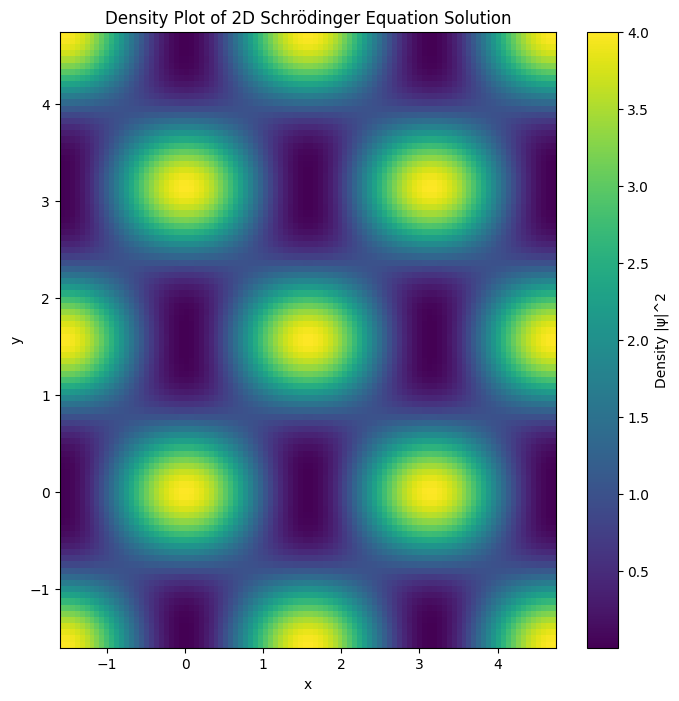

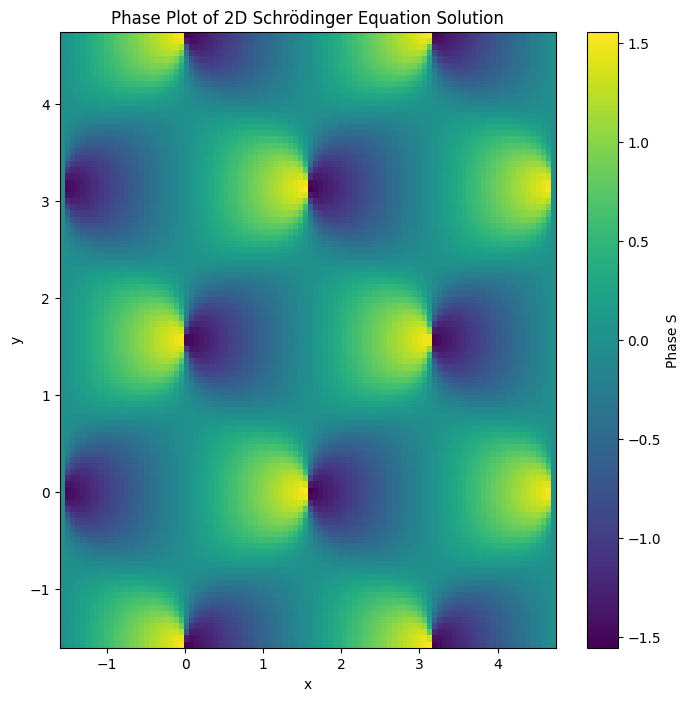

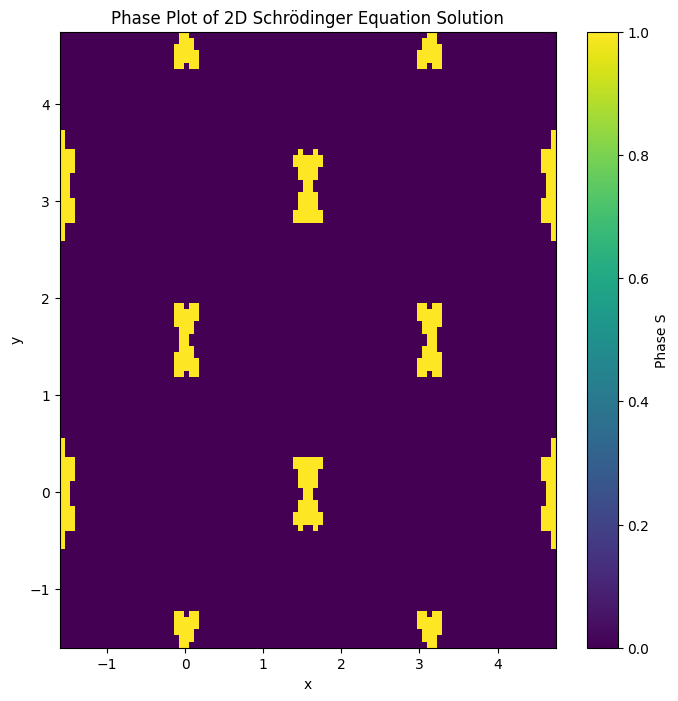

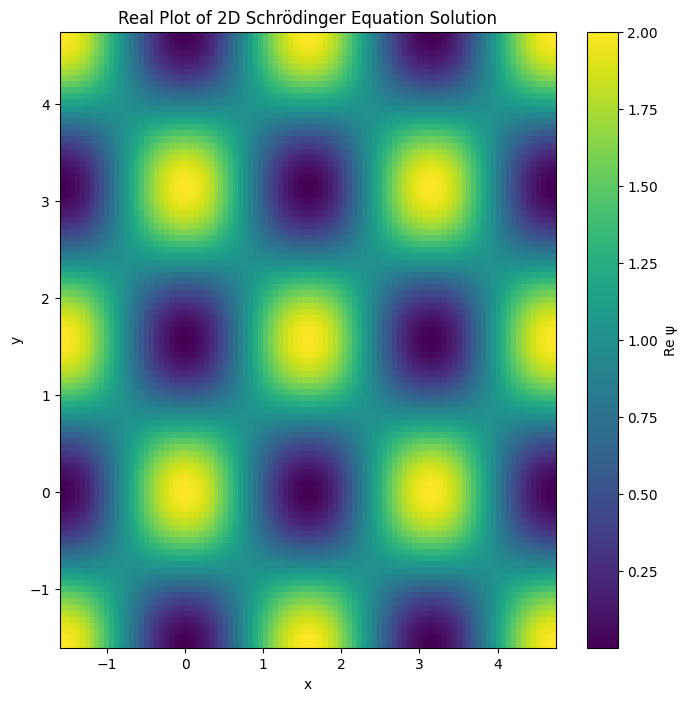

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

# Parameters for the 2D Schrödinger solution
VorPairLin_BgAmp = 1.0
VorPairLin_WaveAmp =  1.0
VorPairLin_ZWaveAmp = 0.0
VorPairLin_Phase0 = 0.0
VorPairLin_kx = 2.0
VorPairLin_ky = 2.0
VorPairLin_kz = 1.0
BoxSize = [2*np.pi, 2*np.pi]  # Example box size
Time = 0.0  # Example time moment
ELBDM_ETA = 1.0  # Just an example value, adjust according to your setup

# Derived parameters
VorPairLin_kx *= 2.0*np.pi/BoxSize[0]
VorPairLin_ky *= 2.0*np.pi/BoxSize[1]
VorPairLin_Omega = 0.5/ELBDM_ETA*(VorPairLin_kx**2 + VorPairLin_ky**2)
VorPairLin_ZWaveOmega = 0.5/ELBDM_ETA*VorPairLin_kz**2

# Grid setup
x = np.linspace(0-np.pi/2, BoxSize[0]-np.pi/2, 100)
y = np.linspace(0-np.pi/2, BoxSize[1]-np.pi/2, 100)
X, Y = np.meshgrid(x, y)

# Wave function computation
phase = VorPairLin_kx*X - VorPairLin_Omega*Time + VorPairLin_Phase0
amp = VorPairLin_WaveAmp*np.cos(VorPairLin_ky*Y)
zphase = VorPairLin_kz*0 - VorPairLin_ZWaveOmega*Time  # Z component is not varied here, set to 0
zamp = VorPairLin_ZWaveAmp
Re = VorPairLin_BgAmp + amp*np.cos(phase) + zamp*np.cos(zphase)
Im = amp*np.sin(phase) + zamp*np.sin(zphase)

# Density calculation
density = Re**2 + Im**2
phase   = np.arctan2(Im, Re)

# Visualization
plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, density, shading='auto')
plt.colorbar(label='Density |ψ|^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Density Plot of 2D Schrödinger Equation Solution')
plt.show()

# Visualization
plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, phase, shading='auto')
plt.colorbar(label='Phase S')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Plot of 2D Schrödinger Equation Solution')
plt.show()

# Visualization
plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, np.abs(np.roll(phase, -1, axis=1) + np.roll(phase, 1, axis=1) - 2 * phase)>0.1, shading='auto')
plt.colorbar(label='Phase S')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Plot of 2D Schrödinger Equation Solution')
plt.show()



# Visualization
plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, Re, shading='auto')
plt.colorbar(label='Re ψ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real Plot of 2D Schrödinger Equation Solution')
plt.show()


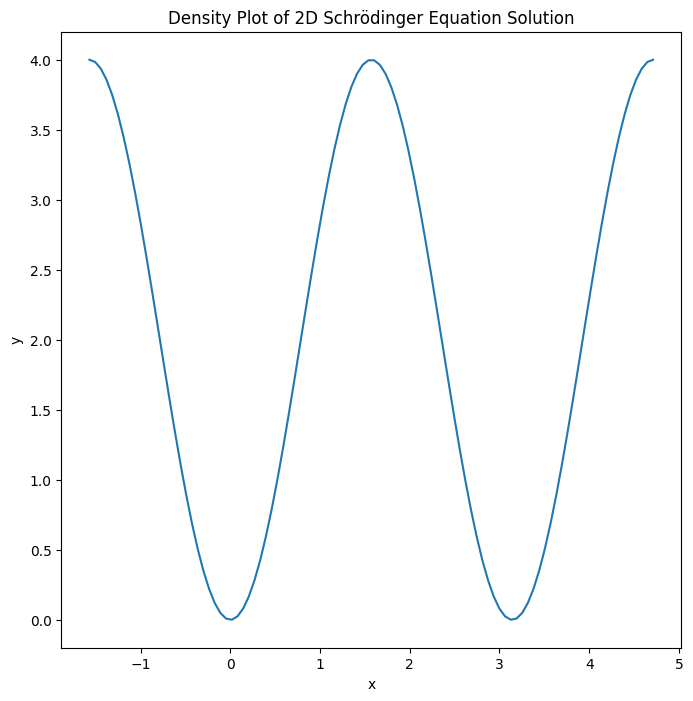

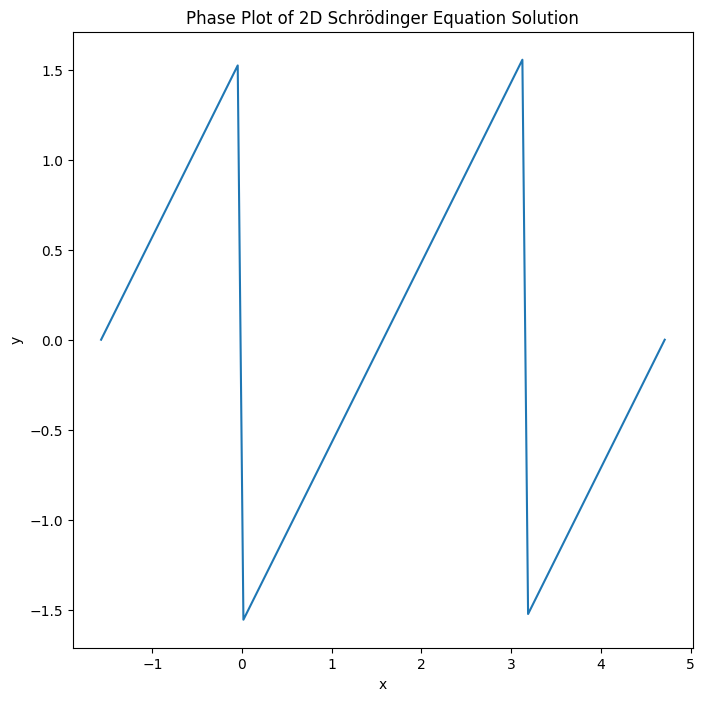

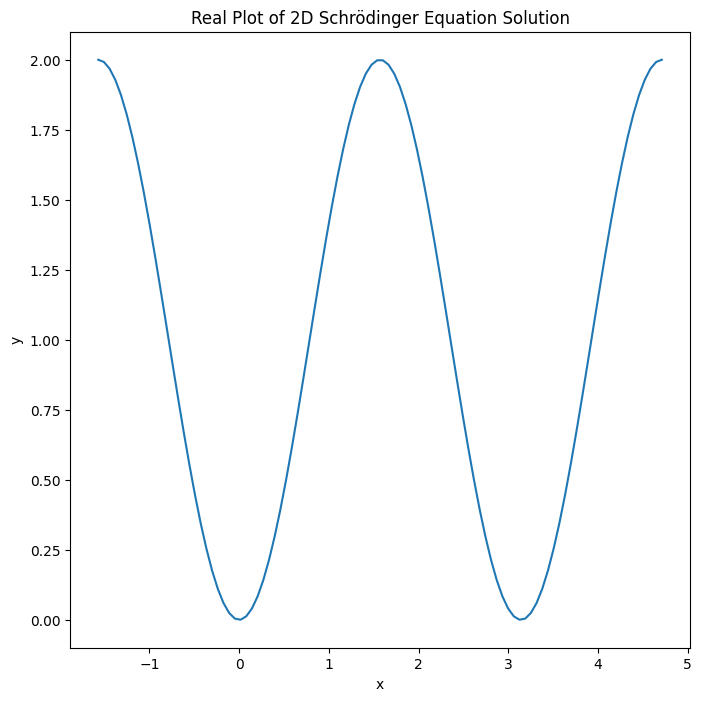

In [9]:

# Visualization
plt.figure(figsize=(8, 8))
plt.plot(X[0, :], density[0, :])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Density Plot of 2D Schrödinger Equation Solution')
plt.show()

# Visualization
plt.figure(figsize=(8, 8))
plt.plot(X[0, :], phase[0, :])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Plot of 2D Schrödinger Equation Solution')
plt.show()


# Visualization
plt.figure(figsize=(8, 8))
plt.plot(X[0, :], Re[0, :])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real Plot of 2D Schrödinger Equation Solution')
plt.show()


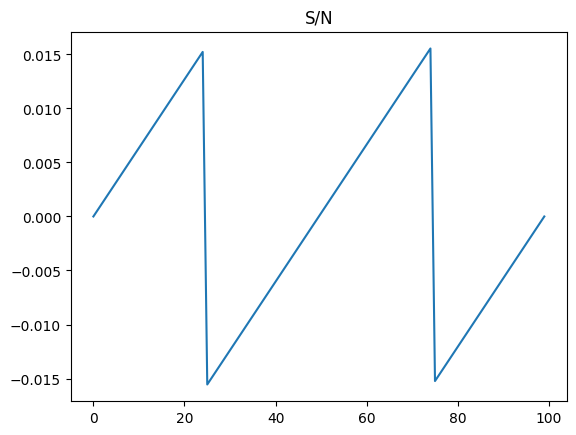

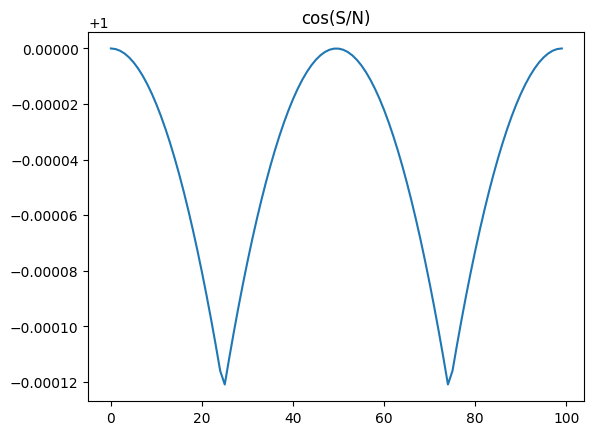

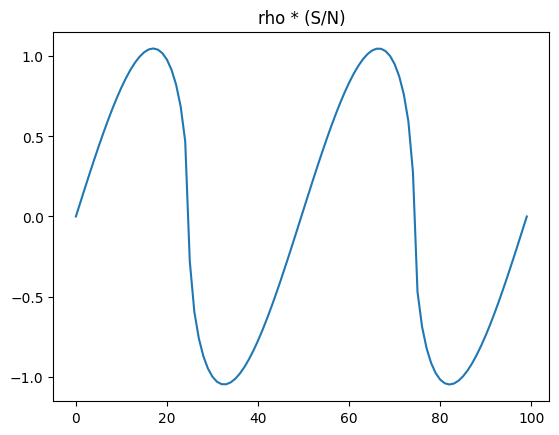

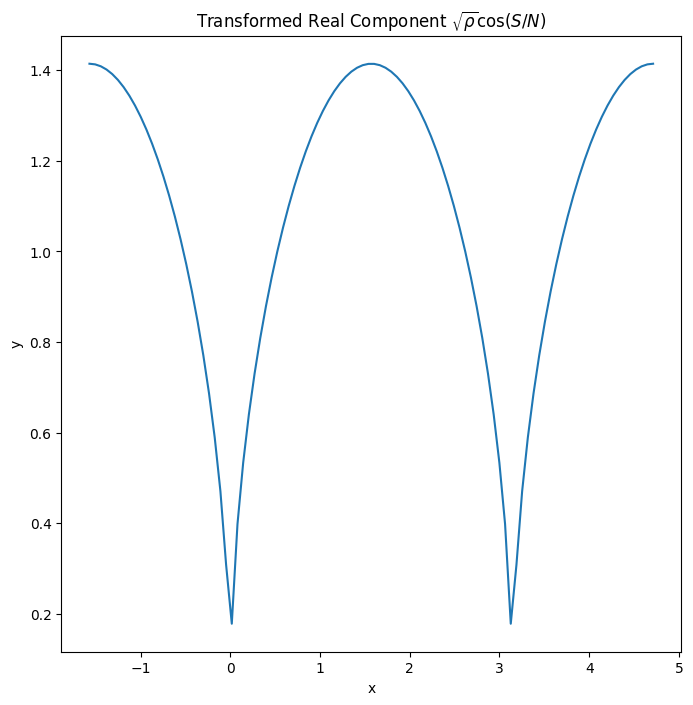

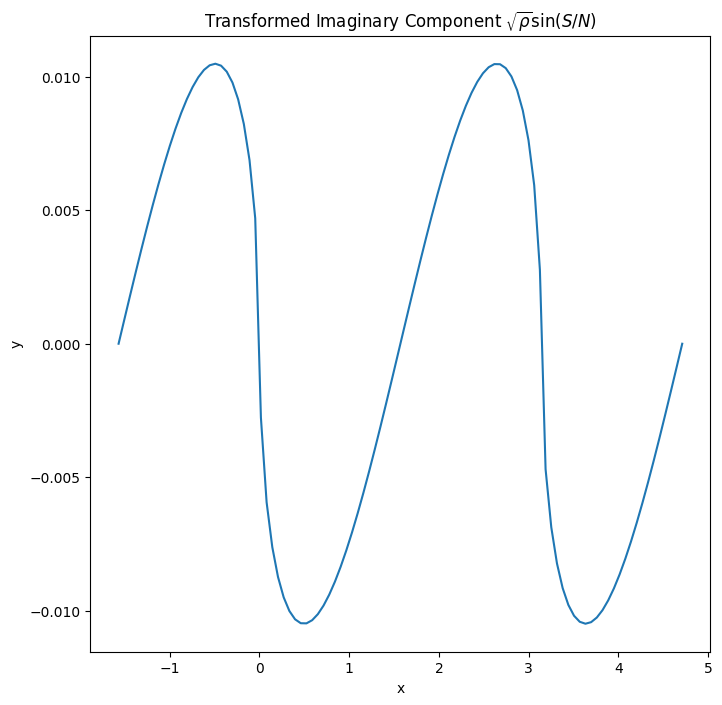

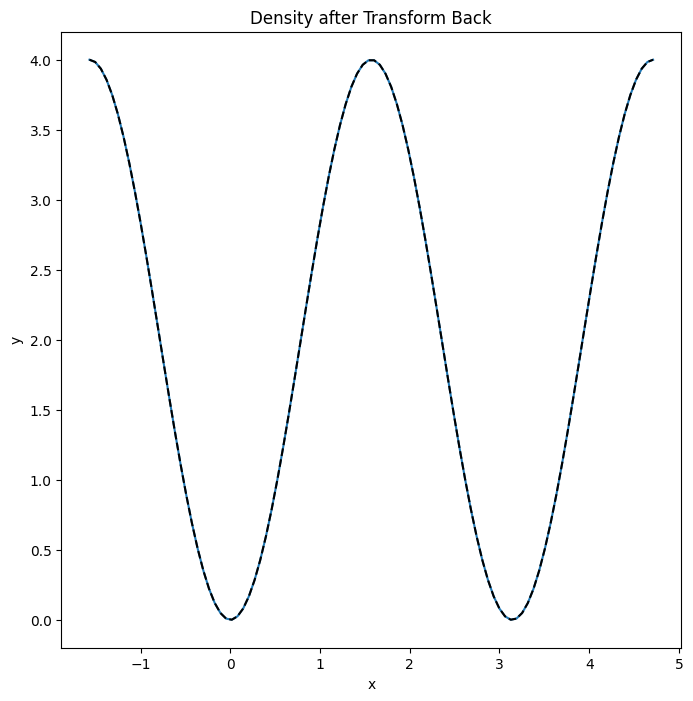

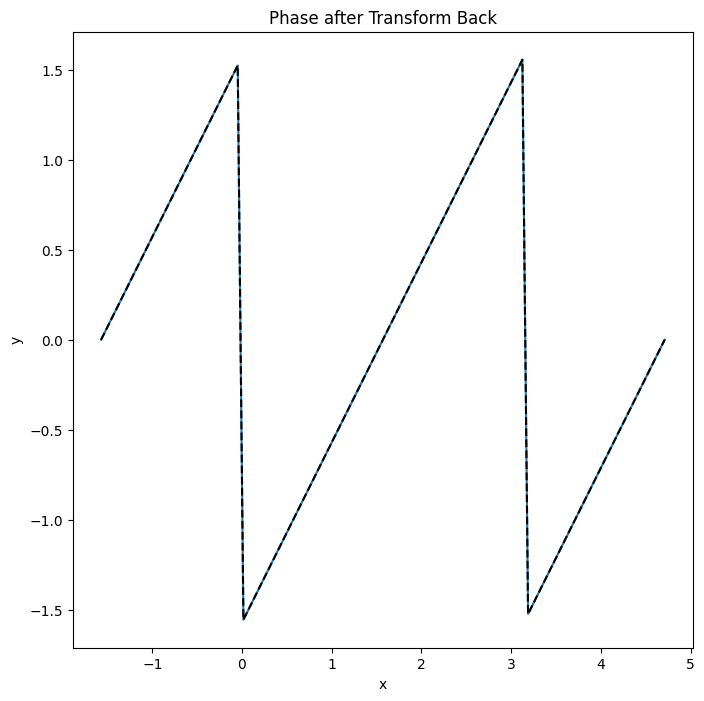

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def complex_to_rho_sin_cos(re, im, N):
    rho = np.sqrt(re**2 + im**2)
    S = np.arctan2(im, re)
    S = np.unwrap(S, axis=0)  # Adjust axis as needed for correct unwrapping
    S = np.unwrap(S, axis=1)
    plt.title("S/N")
    plt.plot(S[0, :]/N)
    plt.show()
    plt.title("cos(S/N)")
    plt.plot(np.cos(S[0, :]/N))
    plt.show()
    plt.title("rho * (S/N)")
    plt.plot(np.sqrt(rho)[0, :] * S[0, :])
    plt.show()
    return np.sqrt(rho) * np.cos(S/N), np.sqrt(rho) * np.sin(S/N)

def rho_sin_cos_to_complex(sqrt_rho_cos, sqrt_rho_sin, N):
    S = np.arctan2(sqrt_rho_sin, sqrt_rho_cos) * N
    rho = sqrt_rho_cos**2 + sqrt_rho_sin**2
    return rho * np.cos(S), rho * np.sin(S)

# Assuming the rest of the setup is the same as in your provided code

# Apply the transformation

for N in [100]:
    sqrt_rho_cos, sqrt_rho_sin = complex_to_rho_sin_cos(Re, Im, N)

    # Transform back
    Re_transformed, Im_transformed = rho_sin_cos_to_complex(sqrt_rho_cos, sqrt_rho_sin, N)
    density_transformed = Re_transformed**2 + Im_transformed**2
    phase_transformed = np.arctan2(Im_transformed, Re_transformed)

    # Visualization of the transformed components
    if False:
        plt.figure(figsize=(8, 8))
        plt.plot(X, Y, sqrt_rho_cos, shading='auto')
        plt.colorbar(label=r'$\sqrt{\rho} \cos(S/N)$')
        plt.title(r'Transformed Real Component $\sqrt{\rho} \cos(S/N)$')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.pcolormesh(X, Y, sqrt_rho_sin, shading='auto')
        plt.colorbar(label=r'$\sqrt{\rho} \sin(S/N)$')
        plt.title(r'Transformed Imaginary Component $\sqrt{\rho} \sin(S/N)$')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        # Visualization after transforming back
        plt.figure(figsize=(8, 8))
        plt.pcolormesh(X, Y, density_transformed, shading='auto')
        plt.colorbar(label='Density |ψ|^2 after Transform Back')
        plt.title('Density after Transform Back')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.pcolormesh(X, Y, phase_transformed, shading='auto')
        plt.colorbar(label='Phase S after Transform Back')
        plt.title('Phase after Transform Back')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    else:
        plt.figure(figsize=(8, 8))
        plt.plot(X[0, :], sqrt_rho_cos[0, :])
        plt.title(r'Transformed Real Component $\sqrt{\rho} \cos(S/N)$')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.plot(X[0, :], sqrt_rho_sin[0, :])
        plt.title(r'Transformed Imaginary Component $\sqrt{\rho} \sin(S/N)$')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        # Visualization after transforming back
        plt.figure(figsize=(8, 8))
        plt.plot(X[0, :], density_transformed[0, :])
        plt.plot(X[0, :], density[0, :], c="k", ls="--")
        plt.title('Density after Transform Back')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.plot(X[0, :], phase_transformed[0, :])
        plt.plot(X[0, :], phase[0, :], c="k", ls="--")
        plt.title('Phase after Transform Back')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()



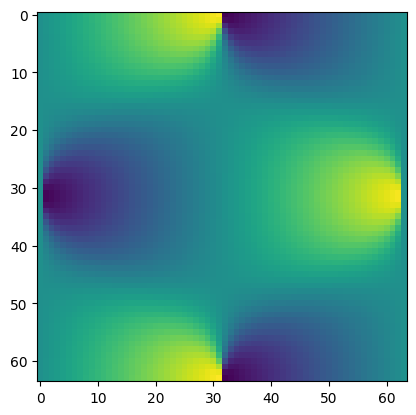

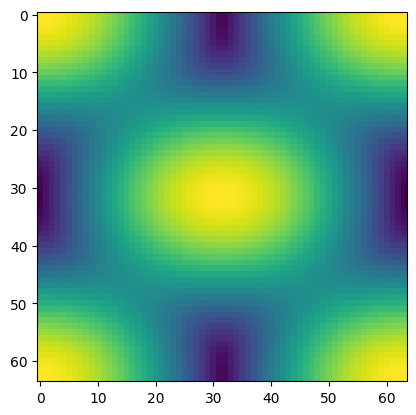

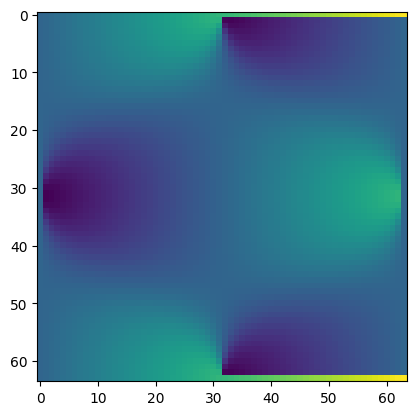

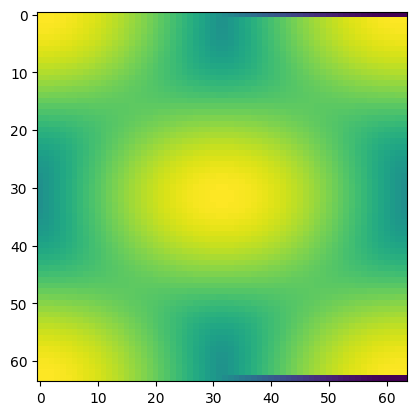

/tmp/ipykernel_123110/1059167317.py:170: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_real = interp2d(x, y, wave_real, kind='cubic')
/tmp/ipykernel_123110/1059167317.py:171: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.

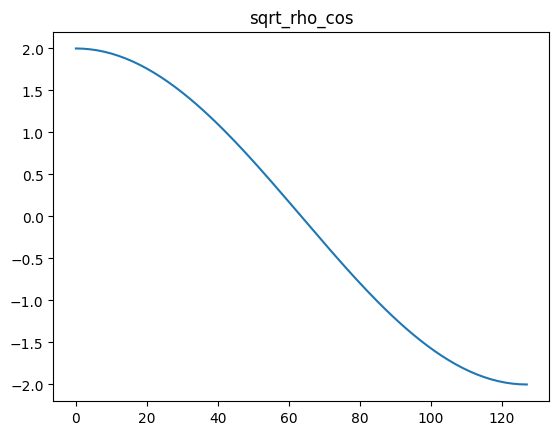

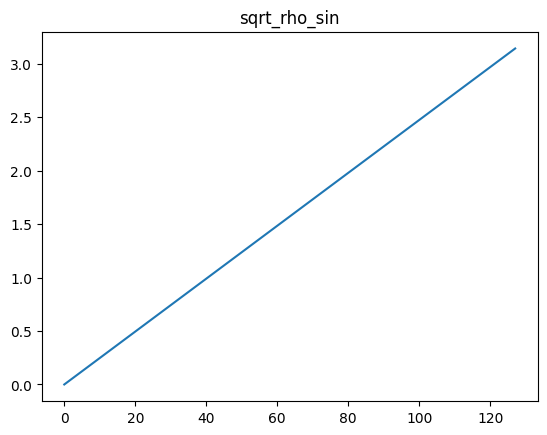

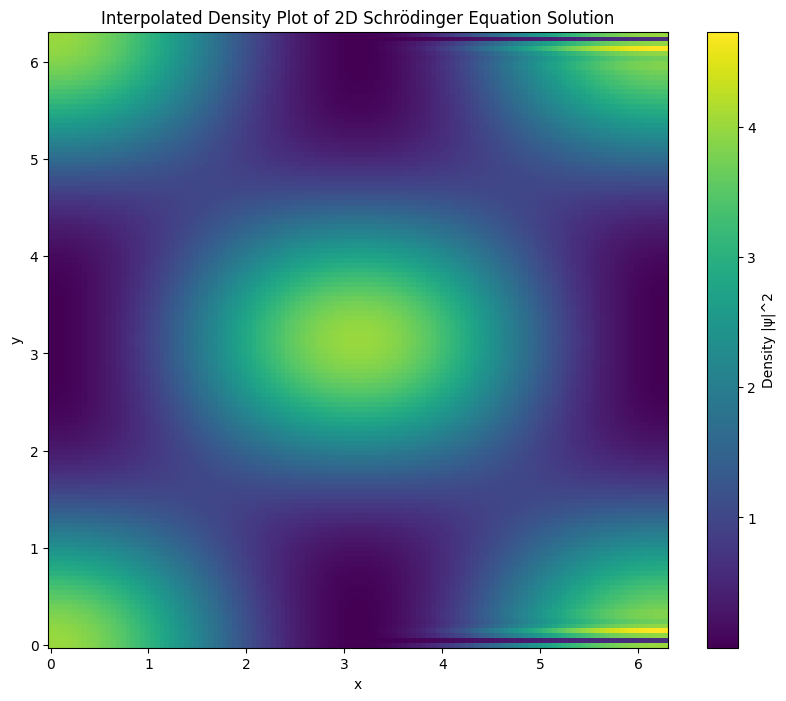

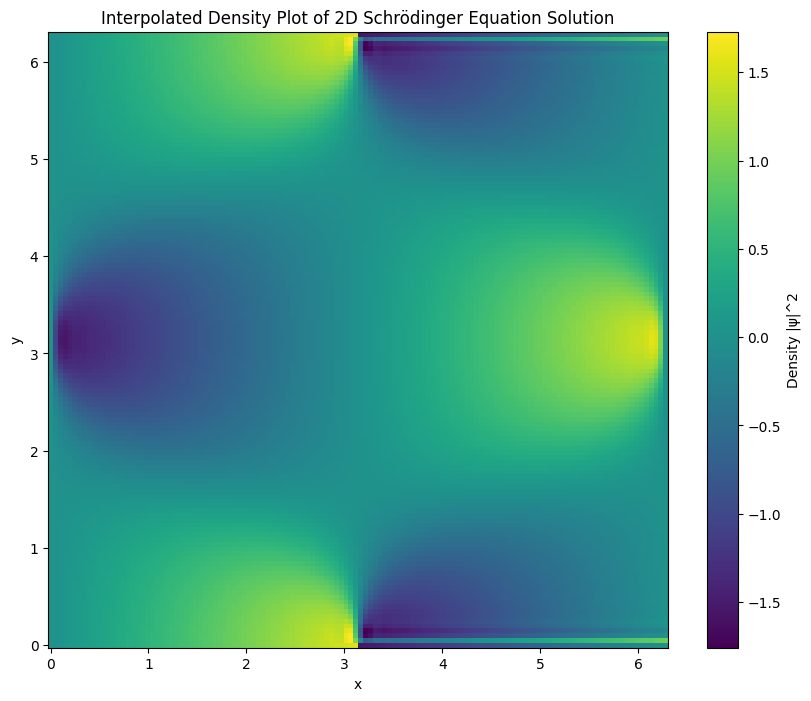

/tmp/ipykernel_123110/1059167317.py:205: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(XI, YI, np.log10(np.abs(hr_wave_function - wave_function_interpolated)), vmin = -6, vmax = 1, shading='auto')


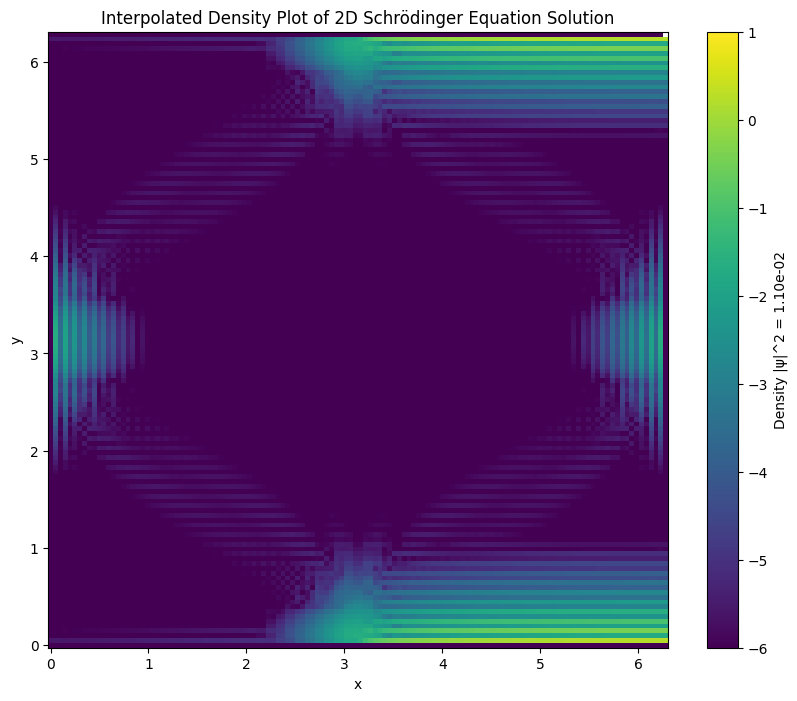

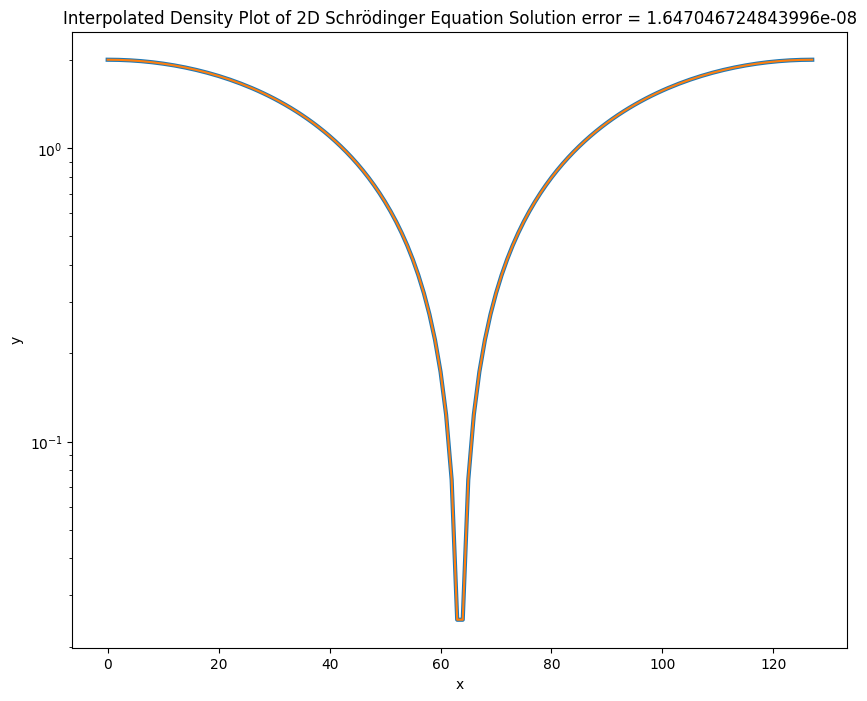

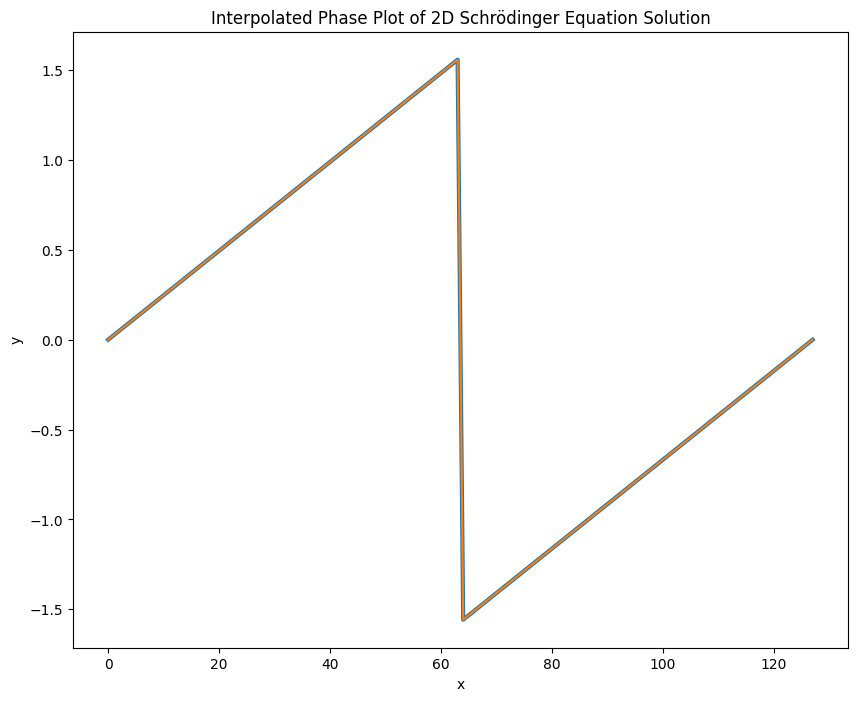

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

# Function to generate the complex wave function based on the Schrödinger equation
def generate_wave_function(x, y, VorPairLin_kx = 1, VorPairLin_ky = 1, time = 0):
    # Given parameters
    VorPairLin_BgAmp = 1
    VorPairLin_WaveAmp = 1
    VorPairLin_Phase0 = 0.0
    VorPairLin_Omega = 0.5  # Simplified for demonstration

    phase = VorPairLin_kx * x - VorPairLin_Omega * time + VorPairLin_Phase0
    amp = VorPairLin_WaveAmp * np.cos(VorPairLin_ky * y)
    Re = VorPairLin_BgAmp + amp * np.cos(phase)
    Im = amp * np.sin(phase)
    return Re + 1j * Im

def singular_gauge_transform(x, rho, S):
    """
    Apply a singular gauge transformation to 1D density and phase fields.

    Parameters:
        x (numpy.ndarray): 1D array of x-coordinates.
        rho (numpy.ndarray): 1D array of densities.
        S (numpy.ndarray): 1D array of phases.

    Returns:
        numpy.ndarray: Transformed densities.
        numpy.ndarray: Transformed phases.
    """
    # Calculate the phase differences
    dS = np.diff(S, prepend=S[0])

    # Detect jumps by finding where the phase difference exceeds pi
    jumps = np.where(np.abs(dS) > np.pi)[0]

    # Adjust the phase to be continuous
    for j in jumps:
        # Assuming the jump is upwards if positive
        if dS[j] > 0:
            S[j:] -= 2 * np.pi
        else:
            S[j:] += 2 * np.pi

    # Adjust rho after jumps; negate rho following the first jump
    # Additional logic could be added here if necessary, for example:
    # if there are specific behaviors associated with negative jumps.
    for j in jumps:
        rho[j:] *= -1

    return rho, S

def complex_to_rho_sin_cos(re, im, N):
    rho = np.sqrt(re**2 + im**2)
    S = np.arctan2(im, re)

    #threshold =
    #S = np.unwrap(S, axis=0)
    #jumps = np.abs(np.diff(S, axis=0, prepend=0)) > 1.4
    #S = np.unwrap(S, axis=1)
    #jumps = np.abs(np.diff(S, axis=0, prepend=0)) > 1.4
#
    #plt.imshow(jumps)
    #plt.show()

    plt.imshow(S)
    plt.show()
    plt.imshow(rho)
    plt.show()

    threshold = np.pi * 0.95

    S = np.unwrap(S, axis=1)

    for x in range(S.shape[0]):
        Sx = S[x, :]
        Rx = rho[x, :]

        # Calculate the phase differences
        dS = np.diff(Sx, prepend=Sx[0])

        # Detect jumps by finding where the phase difference exceeds pi
        jumps = np.where(np.abs(dS) > threshold)[0]

        # Adjust the phase to be continuous
        for j in jumps:
            # Assuming the jump is upwards if positive
            if dS[j] > 0:
                Sx[j:] -= np.pi
            else:
                Sx[j:] += np.pi

        # Adjust rho after jumps; negate rho following the first jump
        # Additional logic could be added here if necessary, for example:
        # if there are specific behaviors associated with negative jumps.
        for j in jumps:
            Rx[j:] *= -1


    plt.imshow(S)
    plt.show()
    plt.imshow(rho)
    plt.show()

    if N == 0:
        return rho, S
    else:
        return rho**2*np.cos(S/N), rho**2*np.sin(S/N)

def rho_sin_cos_to_complex(sqrt_rho_cos, sqrt_rho_sin, N):
    if N == 0:
        rho, S = sqrt_rho_cos, sqrt_rho_sin
        plt.title("sqrt_rho_cos")
        plt.plot(sqrt_rho_cos[0, :])
        plt.show()
        plt.title("sqrt_rho_sin")
        plt.plot(sqrt_rho_sin[0, :])
        plt.show()
    else:
        plt.title("sqrt_rho_cos")
        plt.plot(sqrt_rho_cos[0, :])
        plt.show()
        plt.title("sqrt_rho_sin")
        plt.plot(sqrt_rho_sin[0, :])
        plt.show()
        #S = np.arctan2(sqrt_rho_sin, sqrt_rho_cos) * N
        #rho = sqrt_rho_cos**2 + sqrt_rho_sin**2
        w = np.zeros(sqrt_rho_sin.shape)
        sqrt_rho_cos[sqrt_rho_cos<0] = 1e-15
        w[sqrt_rho_cos == 0] = np.sign(sqrt_rho_sin[sqrt_rho_cos == 0]) * 2
        w[sqrt_rho_cos != 0] = sqrt_rho_sin[sqrt_rho_cos != 0]/sqrt_rho_cos[sqrt_rho_cos != 0]
        w[w>1] = 1
        w[w<-1] = -1
        plt.title("arcsin(sin(S/N))")
        plt.plot(np.arcsin(w[0, :]))
        plt.show()


        rho, S = ((sqrt_rho_cos)**2 + sqrt_rho_sin**2)**0.25,  np.arctan2(sqrt_rho_sin, sqrt_rho_cos) * N
    return rho * np.cos(S), rho * np.sin(S)



Time = 0  # Static moment for simplicity

R = 64
# Original grid points
x = np.linspace(0, 2*np.pi, R)
y = np.linspace(0, 2*np.pi, R)
X, Y = np.meshgrid(x, y)

# Interpolated grid points
xi = np.linspace(0, 2*np.pi, 2 * R)
yi = np.linspace(0, 2*np.pi, 2 * R)
XI, YI = np.meshgrid(xi, yi)

# Generate the complex wave function on the original grid
wave_function = generate_wave_function(X, Y)
hr_wave_function = generate_wave_function(XI, YI)
# Separate real and imaginary parts for interpolation
wave_real = wave_function.real
wave_imag = wave_function.imag

#
N = 0
wave_real, wave_imag = complex_to_rho_sin_cos(wave_real, wave_imag, N = N)

# Perform 2D interpolation
interp_real = interp2d(x, y, wave_real, kind='cubic')
interp_imag = interp2d(x, y, wave_imag, kind='cubic')


# Interpolate on the finer grid
wave_real_interpolated = interp_real(xi, yi)
wave_imag_interpolated = interp_imag(xi, yi)

wave_real_interpolated, wave_imag_interpolated = rho_sin_cos_to_complex(wave_real_interpolated, wave_imag_interpolated, N = N)

# Recombine the interpolated real and imaginary parts
wave_function_interpolated = wave_real_interpolated + 1j * wave_imag_interpolated

# Visualize the density |ψ|^2 of the interpolated wave function
plt.figure(figsize=(10, 8))
plt.pcolormesh(XI, YI, (np.abs(wave_function_interpolated)**2 + 1e-6), shading='auto')
plt.colorbar(label='Density |ψ|^2')
plt.title('Interpolated Density Plot of 2D Schrödinger Equation Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.figure(figsize=(10, 8))
plt.pcolormesh(XI, YI, (np.angle(wave_function_interpolated)), shading='auto')
plt.colorbar(label='Density |ψ|^2')
plt.title('Interpolated Density Plot of 2D Schrödinger Equation Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


def interpolation_error(exact, interpolated):
    return np.mean(np.abs(exact - interpolated))

# Visualize the re + im error
plt.figure(figsize=(10, 8))
plt.pcolormesh(XI, YI, np.log10(np.abs(hr_wave_function - wave_function_interpolated)), vmin = -6, vmax = 1, shading='auto')
plt.colorbar(label=f'Density |ψ|^2 = {interpolation_error(hr_wave_function, wave_function_interpolated):.2e}')
plt.title('Interpolated Density Plot of 2D Schrödinger Equation Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(np.abs(hr_wave_function)[0, :], lw = 3)
plt.plot(np.abs(wave_function_interpolated)[0, :])
plt.yscale("log")
plt.title(f'Interpolated Density Plot of 2D Schrödinger Equation Solution error = {interpolation_error(hr_wave_function[0, :], wave_function_interpolated[0, :])}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



plt.figure(figsize=(10, 8))
plt.plot(np.angle(hr_wave_function)[0, :], lw = 3)
plt.plot(np.angle(wave_function_interpolated)[0, :])
plt.title('Interpolated Phase Plot of 2D Schrödinger Equation Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def complex_to_rho_sin_cos(re, im, N):
    rho = np.sqrt(re**2 + im**2)
    S = np.arctan2(im, re)
    S = np.unwrap(S)
    return np.sqrt(rho) * np.cos(S/N), np.sqrt(rho) * np.sin(S/N)

def rho_sin_cos_to_complex(sqrt_rho_cos, sqrt_rho_sin, N):
    S = np.arctan2(sqrt_rho_sin, sqrt_rho_cos) * N
    rho = sqrt_rho_cos**2 + sqrt_rho_sin**2
    return rho * np.cos(S), rho * np.sin(S)

# Parameters
N = 2
k = 10
x = np.linspace(0, 2*np.pi, 10)  # Original data points
xi = np.linspace(0, 2*np.pi, 100)  # Interpolated data points

# Generate complex data
data = np.exp(1j * k * x)

# Convert to sqrt(rho) * cos(S/N) and sqrt(rho) * sin(S/N)
sqrt_rho_cos, sqrt_rho_sin = complex_to_rho_sin_cos(data.real, data.imag, N)

# Interpolate
interp_cos = interp1d(x, sqrt_rho_cos, kind='linear')
interp_sin = interp1d(x, sqrt_rho_sin, kind='linear')

# Convert interpolated values back to complex
re_interpolated, im_interpolated = rho_sin_cos_to_complex(interp_cos(xi), interp_sin(xi), N)
data_interpolated = re_interpolated + 1j * im_interpolated

# Directly interpolate complex data for comparison
data_direct_interp = interp1d(x, data, kind='linear')(xi)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(xi, data_direct_interp.real, label='Direct Interpolation Real Part', linestyle='--')
plt.plot(xi, data_interpolated.real, label='Improved Method Real Part', alpha=0.7)
plt.plot(xi, data_direct_interp.imag, label='Direct Interpolation Imaginary Part', linestyle='--')
plt.plot(xi, data_interpolated.imag, label='Improved Method Imaginary Part', alpha=0.7)
plt.legend()
plt.title("Comparison of Interpolation Methods")
plt.xlabel("x")
plt.ylabel("Value")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d



def interpolation_error(exact, interpolated):
    return np.mean(np.abs(exact - interpolated))

k_values = np.arange(1, 50)  # Range of k values to test
errors_direct = []
x = np.linspace(0, 2*np.pi, 100)  # Adjust the number of points based on k
xi = np.linspace(0, 2*np.pi, 1000)  # Dense grid for interpolation and error calculation


# Plotting the error as a function of points per wavelength
plt.figure(figsize=(12, 6))

for k in k_values:
    data = np.exp(1j * k * x)
    exact_data = np.exp(1j * k * xi)

    # Direct interpolation
    data_direct_interp = interp1d(x, data, kind='linear', fill_value='extrapolate')(xi)

    # Calculate errors
    errors_direct.append(interpolation_error(exact_data, data_direct_interp))

plt.plot(len(x)/k_values, errors_direct, label='Direct Interpolation Error', marker='o')

for N in [1, 3, 10, 30, 100, 1000, 100000]:
    errors_improved = []

    for k in k_values:
        data = np.exp(1j * k * x)
        exact_data = np.exp(1j * k * xi)
        # Convert to sqrt(rho) * cos(S/N) and sqrt(rho) * sin(S/N), then interpolate
        sqrt_rho_cos, sqrt_rho_sin = complex_to_rho_sin_cos(data.real, data.imag, N)
        interp_cos = interp1d(x, sqrt_rho_cos, kind='linear', fill_value='extrapolate')
        interp_sin = interp1d(x, sqrt_rho_sin, kind='linear', fill_value='extrapolate')
        re_interpolated, im_interpolated = rho_sin_cos_to_complex(interp_cos(xi), interp_sin(xi), N)
        data_improved_method = re_interpolated + 1j * im_interpolated

        errors_improved.append(interpolation_error(exact_data, data_improved_method))
    plt.plot(len(x)/k_values, errors_improved, label=f'Improved Method Error N = {N}', marker='x')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Points Per Wavelength')
plt.ylabel('Interpolation Error (Log Scale)')
plt.title('Interpolation Error vs. Points Per Wavelength')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Assume generate_wave_function(x_grid, y_grid, params) exists and generates a 2D wave function based on provided parameters


def complex_to_rho_sin_cos(re, im, N):
    rho = np.sqrt(re**2 + im**2)
    S = np.arctan2(im, re)
    S = np.unwrap(S, axis=0)  # Adjust axis as needed for correct unwrapping
    S = np.unwrap(S, axis=1)

    if N == 0:
        return rho, S
    else:
        return rho**2, rho*np.sin(S/N)#np.sqrt(rho) * np.cos(S/N), np.sqrt(rho) * np.sin(S/N)

def rho_sin_cos_to_complex(sqrt_rho_cos, sqrt_rho_sin, N):
    if N == 0:
        rho, S = sqrt_rho_cos, sqrt_rho_sin
    else:
        #S = np.arctan2(sqrt_rho_sin, sqrt_rho_cos) * N
        #rho = sqrt_rho_cos**2 + sqrt_rho_sin**2
        w = np.zeros(sqrt_rho_sin.shape)
        sqrt_rho_cos[sqrt_rho_cos<0] = 0
        w[sqrt_rho_cos == 0] = np.sign(sqrt_rho_sin[sqrt_rho_cos == 0]) * 2
        w[sqrt_rho_cos != 0] = sqrt_rho_sin[sqrt_rho_cos != 0]/sqrt_rho_cos[sqrt_rho_cos != 0]**0.5
        w[w>1] = 1
        w[w<-1] = -1

        rho, S = (sqrt_rho_cos)**(0.5), np.arcsin(w) * N
    return rho * np.cos(S), rho * np.sin(S)


# Function to generate the complex wave function based on the Schrödinger equation
def generate_wave_function(x, y, VorPairLin_kx = 1, VorPairLin_ky = 1, time = 0):
    # Given parameters
    VorPairLin_BgAmp = 0.5
    VorPairLin_WaveAmp = -1.0
    VorPairLin_Phase0 = 0.0
    VorPairLin_Omega = 0.5  # Simplified for demonstration

    phase = VorPairLin_kx * x - VorPairLin_Omega * time + VorPairLin_Phase0
    amp = VorPairLin_WaveAmp * np.cos(VorPairLin_ky * y)
    Re = VorPairLin_BgAmp + amp * np.cos(phase)
    Im = amp * np.sin(phase)
    return Re + 1j * Im

#def generate_wave_function(x, y, VorPairLin_kx = 1, VorPairLin_ky = 1, time = 0):
#    return np.exp(1j * x * VorPairLin_kx + 1j * y * VorPairLin_ky)
def interpolation_error(exact, interpolated):
    return np.mean(np.abs(exact - interpolated))

k_values = np.logspace(-1, 1, 10)  # Range of k values to test

x = np.linspace(0, 2*np.pi, 32)  # Original grid
y = np.linspace(0, 2*np.pi, 32)
X, Y = np.meshgrid(x, y)

xi = np.linspace(0, 2*np.pi, 64)  # Interpolation grid
yi = np.linspace(0, 2*np.pi, 64)
XI, YI = np.meshgrid(xi, yi)


errors = []
fields = {}
for k in k_values:
    # Generate exact wave function data on a dense grid
    exact_data = generate_wave_function(XI, YI, k, k)

    # Generate sample wave function data on a sparse grid and interpolate
    data = generate_wave_function(X, Y, k, k )
    # Convert to sqrt(rho) * cos(S/N) and sqrt(rho) * sin(S/N), then interpolatev
    real, imag = data.real, data.imag
    data_real_interp = griddata((X.flatten(), Y.flatten()), real.flatten(), (XI, YI), method='cubic')
    data_imag_interp = griddata((X.flatten(), Y.flatten()), imag.flatten(), (XI, YI), method='cubic')
    re_interpolated, im_interpolated = data_real_interp, data_imag_interp
    data_improved_method = re_interpolated + 1j * im_interpolated


    # Calculate and plot error
    errors.append(interpolation_error(exact_data, data_improved_method))
    fields[f"N = {-1} k = {k}"] = (exact_data, data_improved_method)

plt.plot(len(x)/k_values, errors, label=f'Standard method', marker='x')

for N in [0, 1, 10, 100]:
    errors_improved = []

    for k in k_values:
        # Generate exact wave function data on a dense grid
        exact_data = generate_wave_function(XI, YI, k, k)

        # Generate sample wave function data on a sparse grid and interpolate
        data = generate_wave_function(X, Y, k, k )
        # Convert to sqrt(rho) * cos(S/N) and sqrt(rho) * sin(S/N), then interpolate
        real, imag = complex_to_rho_sin_cos(data.real, data.imag, N)
        data_real_interp = griddata((X.flatten(), Y.flatten()), real.flatten(), (XI, YI), method='cubic')
        data_imag_interp = griddata((X.flatten(), Y.flatten()), imag.flatten(), (XI, YI), method='cubic')
        re_interpolated, im_interpolated = rho_sin_cos_to_complex(data_real_interp, data_imag_interp, N)
        data_improved_method = re_interpolated + 1j * im_interpolated


        # Calculate and plot error
        errors_improved.append(interpolation_error(exact_data, data_improved_method))

        fields[f"N = {N} k = {k}"] = (exact_data, data_improved_method)
    plt.plot(len(x)/k_values, errors_improved, label=f'Improved Method Error N = {N}', marker='x')

w = len(x)/k_values
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Points Per Wavelength')
plt.ylabel('Interpolation Error (Log Scale)')
plt.title('Interpolation Error vs. Points Per Wavelength')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [ ]:
for key, item in fields.items():
    plt.title(key)
    plt.imshow(np.log10(np.abs(item[0] - item[1])), vmin=-3, vmax = 1)
    plt.colorbar()
    plt.show()


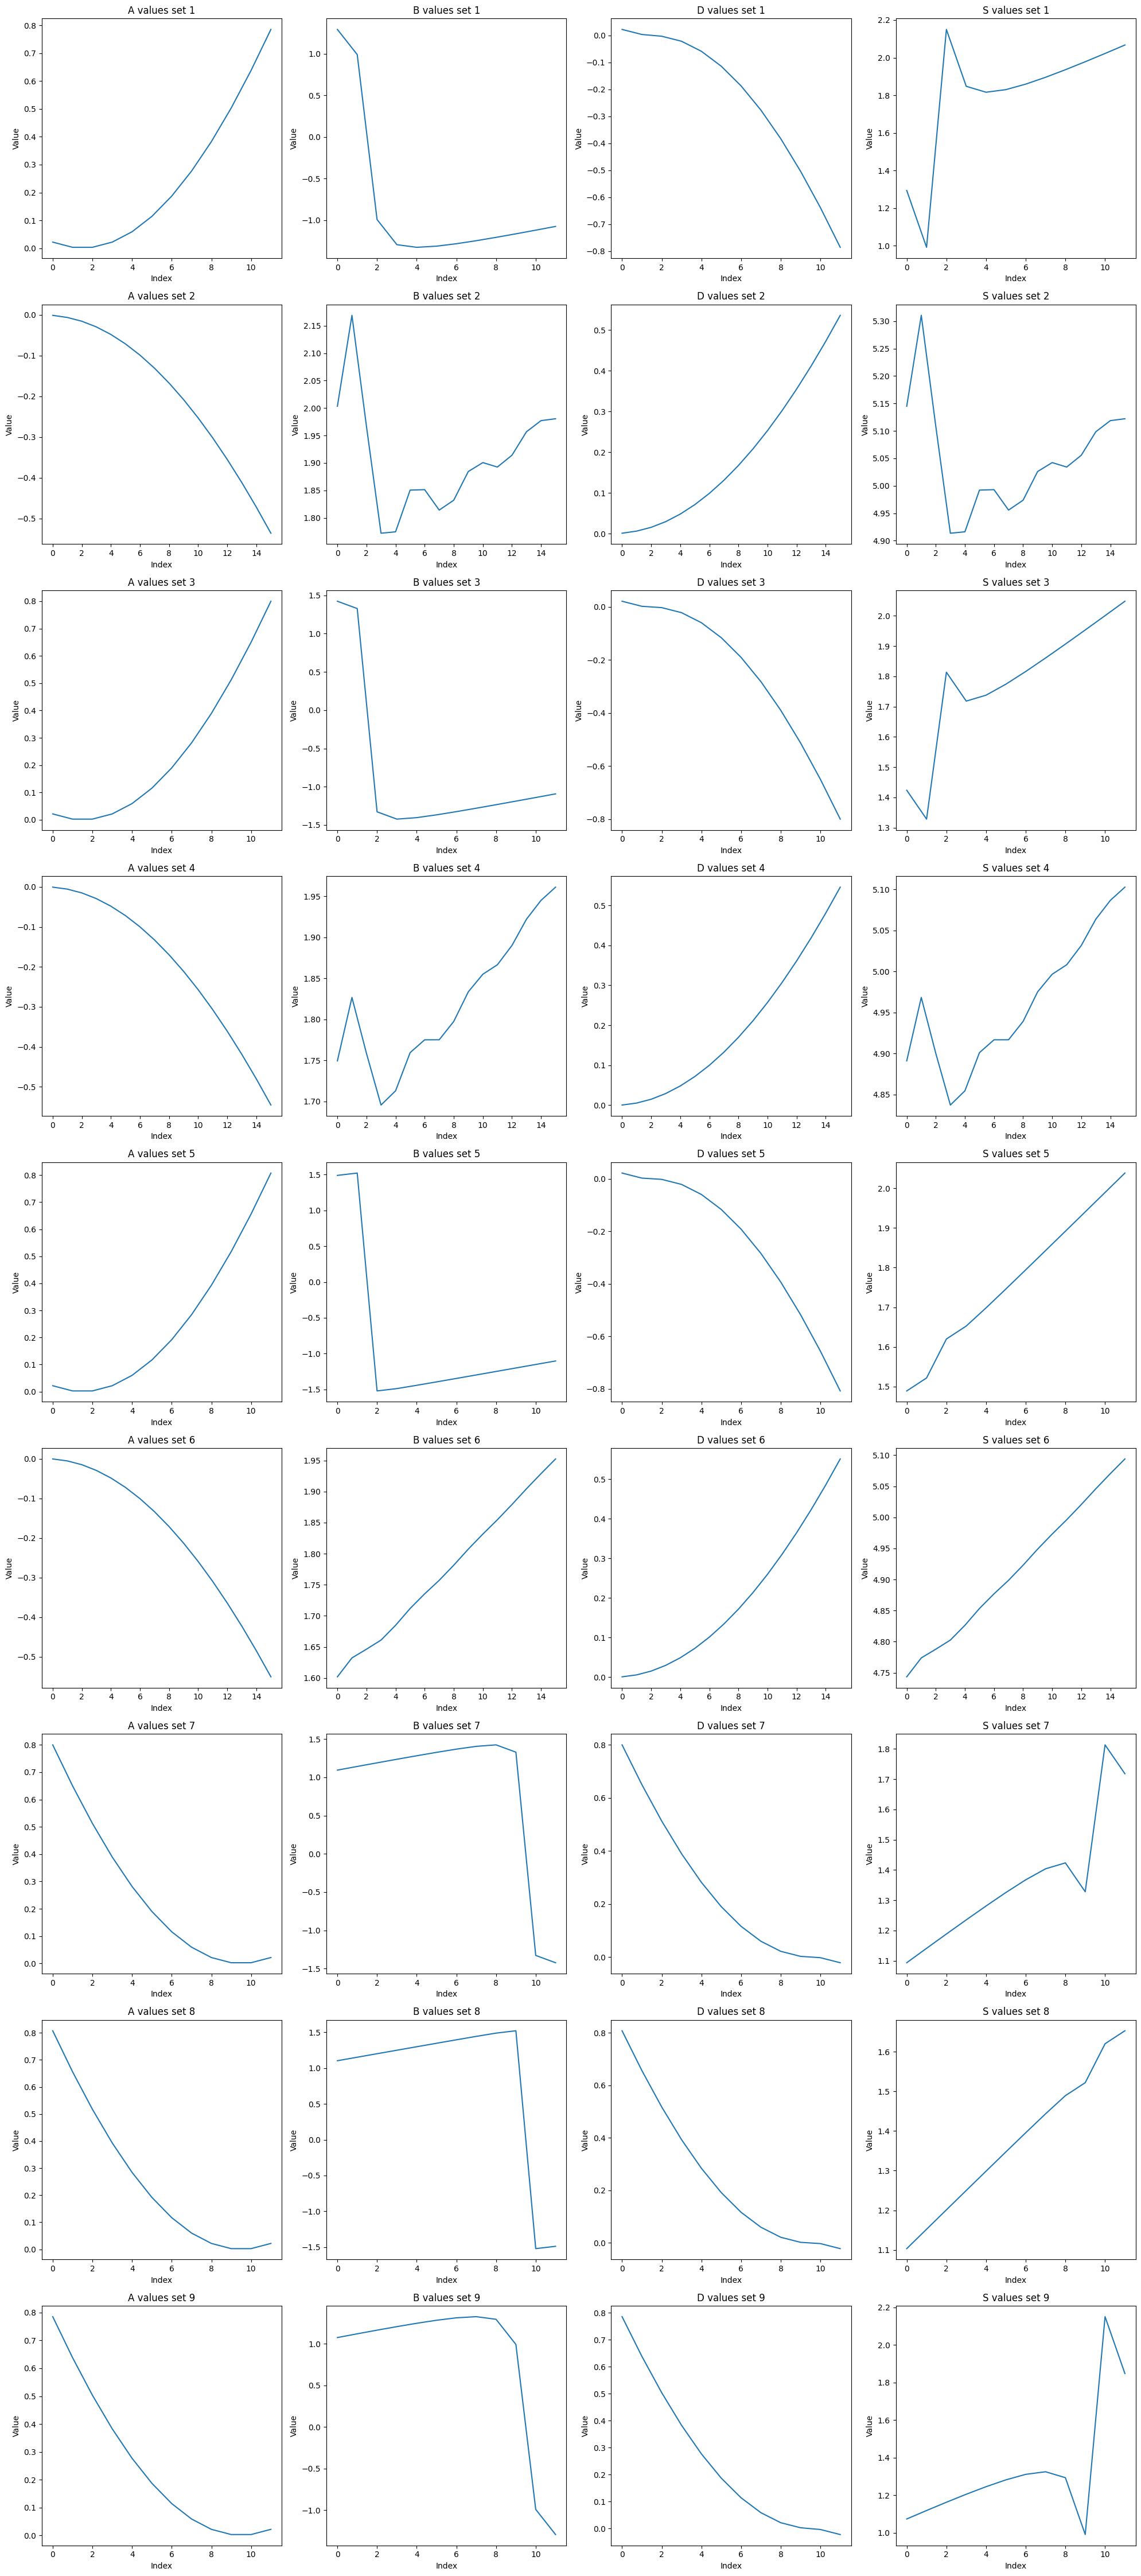

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def read_and_plot(filename):
    # Open the file for reading
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Initialize lists to store A, B, D, and S values
    A_values = []
    B_values = []
    D_values = []
    S_values = []   # Read every four lines and check for uniqueness
    for i in range(0, len(lines), 4):
        if i + 3 < len(lines):
            A_line = lines[i].strip()
            B_line = lines[i+1].strip()
            D_line = lines[i+2].strip()
            S_line = lines[i+3].strip()

            # Convert lines to numpy arrays of floats
            if A_line.startswith('A:') and B_line.startswith('B:') and D_line.startswith('D:') and S_line.startswith('S:'):
                A_nums = np.array(list(map(float, A_line[2:].split())))
                B_nums = np.array(list(map(float, B_line[2:].split())))
                D_nums = np.array(list(map(float, D_line[2:].split())))
                S_nums = np.array(list(map(float, S_line[2:].split())))

                # Check if the current set is a duplicate
                is_duplicate = False
                for j in range(len(A_values)):
                    if np.array_equal(A_nums, A_values[j]) and np.array_equal(B_nums, B_values[j]) \
                       and np.array_equal(D_nums, D_values[j]) and np.array_equal(S_nums, S_values[j]):
                        is_duplicate = True
                        break

                if not is_duplicate:
                    A_values.append(A_nums)
                    B_values.append(B_nums)
                    D_values.append(D_nums)
                    S_values.append(S_nums)


    # Create plots for each set of A, B, D, and S values
    num_sets = len(A_values)
    fig, axs = plt.subplots(num_sets, 4, figsize=(20, 5 * num_sets))  # Adjust subplot grid as necessary

    for i in range(num_sets):
        # Plot A values
        axs[i, 0].plot(A_values[i])
        axs[i, 0].set_title('A values set {}'.format(i + 1))
        axs[i, 0].set_xlabel('Index')
        axs[i, 0].set_ylabel('Value')

        # Plot B values
        axs[i, 1].plot(B_values[i])
        axs[i, 1].set_title('B values set {}'.format(i + 1))
        axs[i, 1].set_xlabel('Index')
        axs[i, 1].set_ylabel('Value')

        # Plot D values
        axs[i, 2].plot(D_values[i])
        axs[i, 2].set_title('D values set {}'.format(i + 1))
        axs[i, 2].set_xlabel('Index')
        axs[i, 2].set_ylabel('Value')

        # Plot S values
        axs[i, 3].plot(S_values[i])
        axs[i, 3].set_title('S values set {}'.format(i + 1))
        axs[i, 3].set_xlabel('Index')
        axs[i, 3].set_ylabel('Value')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Usage example, assuming 'runs.txt' is the file with the data
read_and_plot('runs.txt')


In [41]:
1.521709 +1.521709

3.043418

In [43]:
np.pi*0.99

3.1101767270538954

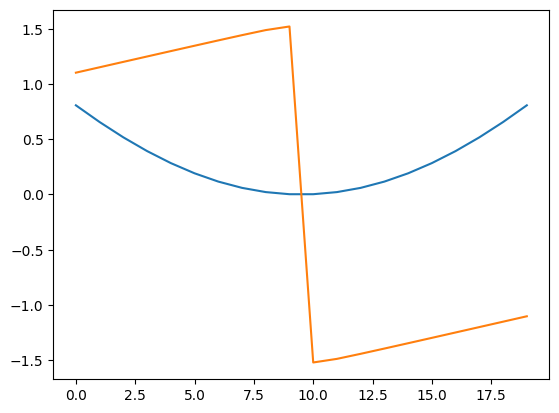

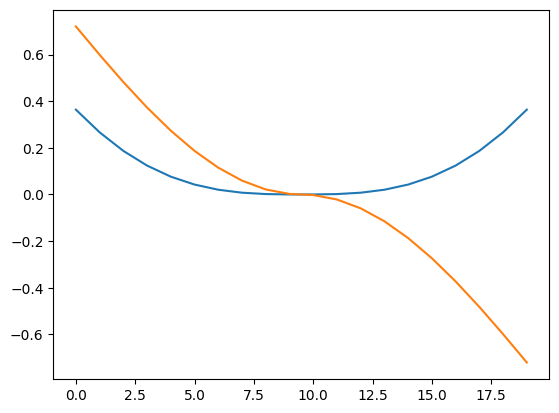

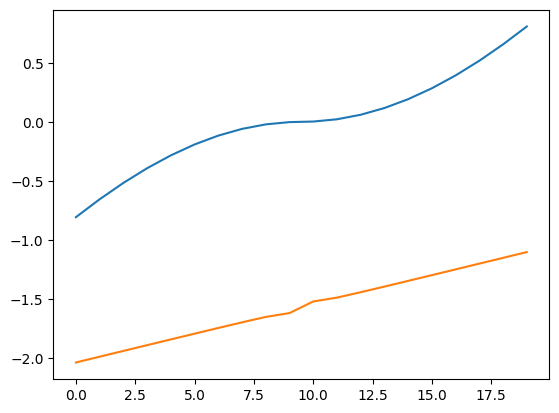

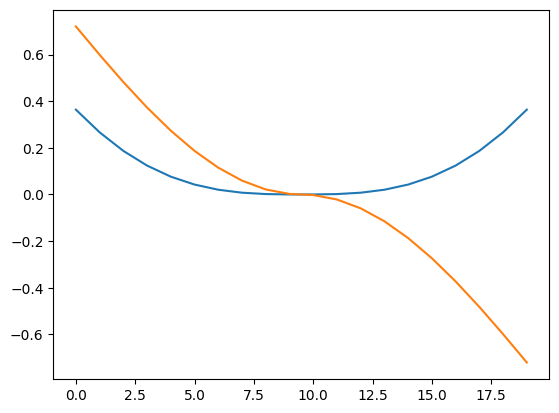

In [44]:
A = np.array([0.807629, 0.656092, 0.517475, 0.393112, 0.284201 ,0.191792, 0.116772, 0.059867 ,0.021622, 0.002408 ,0.002408 , 0.021622  , 0.059867 ,0.116772  ,0.191792 ,0.284201, 0.393112 ,0.517475, 0.656092 ,0.807629])
B = np.array([1.103269, 1.152194, 1.201079, 1.249904, 1.298638 ,1.347219, 1.395517, 1.443192 ,1.488996, 1.521709 ,-1.521709, -1.488996,-1.443192, -1.395517 ,-1.347219, -1.298638 ,-1.249904, -1.201079 ,-1.152194 ,-1.103269])
plt.plot(A)
plt.plot(B)
plt.show()

plt.plot(A * np.cos(B))
plt.plot(A * np.sin(B))
plt.show()
A[:10] *= -1
B[:10] -= np.pi

plt.plot(A)
plt.plot(B)
plt.show()

plt.plot(A * np.cos(B))
plt.plot(A * np.sin(B))
plt.show()

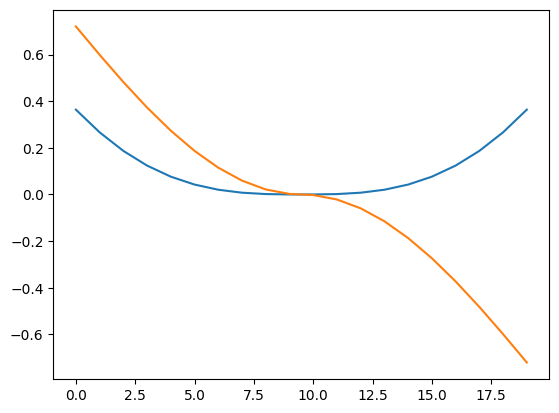

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Assume generate_wave_function(x_grid, y_grid, params) exists and generates a 2D wave function based on provided parameters

params_list = [{'VorPairLin_BgAmp': 1.0, 'VorPairLin_WaveAmp': -1.0, ...},  # Example parameter set
               ...]

x = np.linspace(0, 2*np.pi, 100)  # Original grid
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)

xi = np.linspace(0, 2*np.pi, 1000)  # Interpolation grid
yi = np.linspace(0, 2*np.pi, 1000)
XI, YI = np.meshgrid(xi, yi)

for params in params_list:
    # Generate exact wave function data on a dense grid
    exact_data = generate_wave_function(XI, YI, params)
    
    # Generate sample wave function data on a sparse grid and interpolate
    data = generate_wave_function(X, Y, params)
    data_real_interp = griddata((X.flatten(), Y.flatten()), data.real.flatten(), (XI, YI), method='cubic')
    data_imag_interp = griddata((X.flatten(), Y.flatten()), data.imag.flatten(), (XI, YI), method='cubic')
    data_interpolated = data_real_interp + 1j * data_imag_interp
    
    # Calculate and plot error
    error = np.mean(np.abs(exact_data - data_interpolated))
    plt.loglog(params['VorPairLin_WaveAmp'], error, 'o-', label=f"Error for WaveAmp {params['VorPairLin_WaveAmp']}")

plt.xlabel('Parameter Value')
plt.ylabel('Interpolation Error')
plt.legend()
plt.show()
